In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
hdata=pd.read_csv("../Datasets/Bengaluru_House_Data.csv")
hdata

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
hdata.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
hdata['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
hdata['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
hdata['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [11]:
hdata['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
# Handling null values

In [13]:
hdata.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
hdata.shape

(13320, 9)

In [15]:
hdata['balcony'].median()

2.0

In [18]:
# imputation with median
hdata['balcony']=hdata['balcony'].fillna(hdata.balcony.median())
hdata.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [20]:
hdata1=hdata.drop(['society','availability'],axis=1)
hdata1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [24]:
hdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [25]:
# which society it do belong is also not giving any insights for the prize of the house
# As Availablity and society isn't affecting much means availablity is yes or no it won't affect the prize of the house someone wants to buy:

In [26]:
hdata1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [27]:
hdata1=hdata1.dropna()
hdata1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [28]:
hdata1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [32]:
hdata1['bhk']=hdata1['size'].apply(lambda x: int(x.split(' ')[0]))
# spliting According to the first space :
hdata1.bhk.unique()

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_12596/3620953947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdata1['bhk']=hdata1['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [33]:
hdata1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [36]:
hdata1[-hdata['total_sqft'].apply(is_float)].head(10)
# Negation is for altered value or opposite the Value We Want :
# only False value will be returned:

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_12596/371863228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hdata1[-hdata['total_sqft'].apply(is_float)].head(10)


,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [37]:
# Coverting a sqft to num:

In [44]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [45]:
hdata2=hdata1.copy()
hdata2.total_sqft=hdata2.total_sqft.apply(convert_sqft_to_num)
hdata2=hdata2[hdata2.total_sqft.notnull()]
hdata2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [48]:
print(hdata2.iloc[30])
hdata1.iloc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object


area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft             2100 - 2850
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [49]:
hdata2.dtypes

area_type      object
location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [52]:
hdata3=hdata2.copy()
hdata3["price_per_sqft"]=hdata3['price']*100000/hdata3['total_sqft']
hdata3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [53]:
hdata3.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,1.602348,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,0.804268,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,2.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [56]:
hdata3['location'].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [57]:
hdata3.location = hdata3.location.apply(lambda x:x.strip())
location_stats=hdata3['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [61]:
len(location_stats[location_stats>10])
# these enteries are'nt affecting much 

240

In [60]:
len(location_stats[location_stats<=10])

1047

In [62]:
# Dimensionality Reduction 

In [63]:
location_stats_less_than_10 =location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [64]:
len(hdata3.location.unique())

1287

In [66]:
hdata3.location=hdata3.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(hdata3.location.unique())

241

In [67]:
hdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   location        13200 non-null  object 
 2   size            13200 non-null  object 
 3   total_sqft      13200 non-null  float64
 4   bath            13200 non-null  float64
 5   balcony         13200 non-null  float64
 6   price           13200 non-null  float64
 7   bhk             13200 non-null  int64  
 8   price_per_sqft  13200 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [68]:
hdata3['area_type'].value_counts()

Super built-up  Area    8729
Built-up  Area          2394
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='price'>

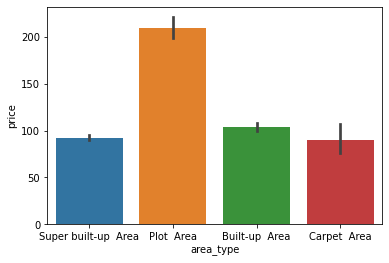

In [70]:
sns.barplot(x='area_type', y='price',data=hdata3)

In [73]:
hdata3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [74]:
hdata3.bath.value_counts()

2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [75]:
# its not common to have 40 bathrooms it may seem an outlier value we can handle it by removing it from the Entry

Text(0, 0.5, 'Count')

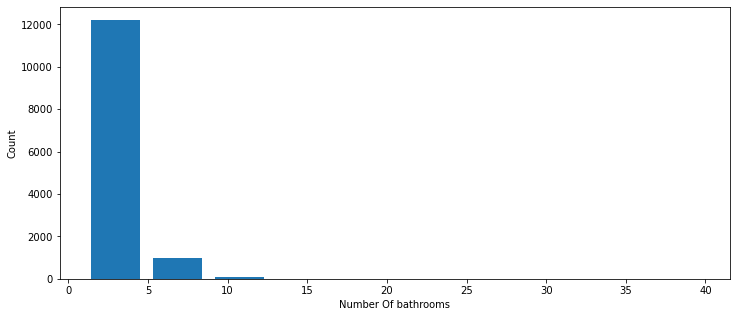

In [77]:
plt.figure(figsize=(12,5))
plt.hist(hdata.bath,rwidth=0.8)
plt.xlabel("Number Of bathrooms")
plt.ylabel('Count')

In [78]:
hdata3[hdata.bath>10]

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_12596/2028056699.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hdata3[hdata.bath>10]


,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
938,Plot Area,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,2.0,290.0,9,23015.873016
1078,Plot Area,other,9 Bedroom,3300.0,14.0,2.0,500.0,9,15151.515152
1718,Super built-up Area,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,Plot Area,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
1953,Plot Area,KR Puram,8 Bedroom,1200.0,12.0,2.0,110.0,8,9166.666667
1979,Plot Area,other,8 Bedroom,990.0,12.0,0.0,120.0,8,12121.212121
3096,Super built-up Area,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
3379,Super built-up Area,other,19 BHK,2000.0,16.0,2.0,490.0,19,24500.000000
3609,Super built-up Area,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
4684,Plot Area,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43,27500.000000


In [80]:
hdata4=hdata3.copy()
out=hdata4[hdata4.bath>hdata3.bhk+3]
ind =out.index
for i in ind:
    hdata4=hdata4.drop(i)
hdata4.shape

(13193, 9)

In [81]:
hdata4[hdata4.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
938,Plot Area,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,2.0,290.0,9,23015.873016
1718,Super built-up Area,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,Plot Area,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
3096,Super built-up Area,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
3379,Super built-up Area,other,19 BHK,2000.0,16.0,2.0,490.0,19,24500.000000
3609,Super built-up Area,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
4684,Plot Area,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43,27500.000000
4916,Super built-up Area,other,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
6937,Plot Area,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,2.0,675.0,9,25961.538462
7979,Super built-up Area,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000


In [82]:
hdata3.shape

(13200, 9)

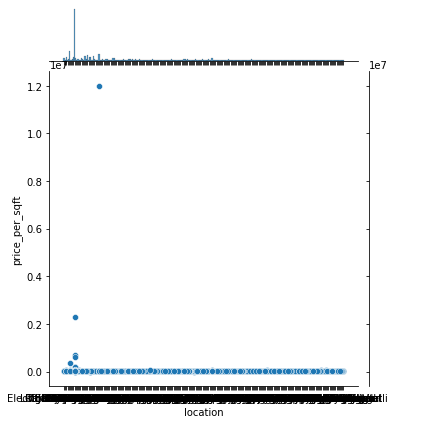

In [84]:
sns.jointplot(x='location',y='price_per_sqft',data=hdata4)

In [86]:
hdata4[hdata4['price_per_sqft']>0.2e7].value_counts()

area_type       location        size       total_sqft  bath  balcony  price  bhk  price_per_sqft
Built-up  Area  other           7 BHK      5.0         7.0   3.0      115.0  7    2300000.0         1
Plot  Area      Sarjapur  Road  4 Bedroom  1.0         4.0   2.0      120.0  4    12000000.0        1
dtype: int64

In [95]:
# the price_per_sqft is very high in sarjapur location
x=hdata4[hdata4['location']=='Sarjapur  Road']

In [96]:
x

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
41,Super built-up Area,Sarjapur Road,3 BHK,1254.0,3.0,2.0,38.00,3,3030.303030
115,Built-up Area,Sarjapur Road,3 Bedroom,2497.0,3.0,2.0,140.00,3,5606.728074
219,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,2.0,98.29,3,5500.279799
220,Super built-up Area,Sarjapur Road,3 BHK,1787.0,3.0,2.0,125.00,3,6994.963626
223,Super built-up Area,Sarjapur Road,2 BHK,984.0,2.0,1.0,44.28,2,4500.000000
...,...,...,...,...,...,...,...,...,...
13246,Built-up Area,Sarjapur Road,4 Bedroom,2758.0,4.0,1.0,240.00,4,8701.957941
13248,Super built-up Area,Sarjapur Road,2 BHK,1132.0,2.0,1.0,70.00,2,6183.745583
13263,Built-up Area,Sarjapur Road,3 BHK,1380.0,2.0,2.0,55.00,3,3985.507246
13290,Super built-up Area,Sarjapur Road,4 BHK,4050.0,2.0,1.0,450.00,4,11111.111111


In [97]:
x[x['bhk']>=4]['price_per_sqft']

300       5582.393988
573      10089.686099
1186      8995.502249
1599      7540.744344
1614      6661.807580
             ...     
12957    10800.000000
13027     5506.257110
13246     8701.957941
13290    11111.111111
13293     8041.237113
Name: price_per_sqft, Length: 61, dtype: float64

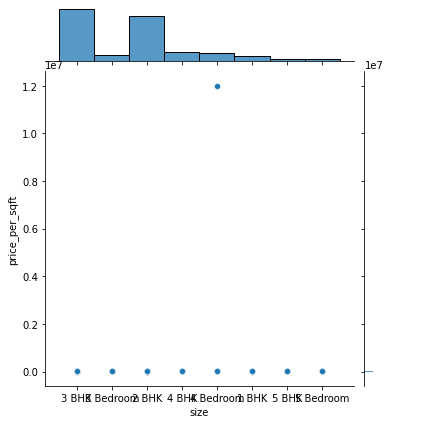

In [99]:
sns.jointplot(x='size',y='price_per_sqft',data=x)

In [101]:
hdata4['price_per_sqft'].describe()

count    1.319300e+04
mean     7.915005e+03
std      1.067545e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.434783e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [105]:
x=hdata4[hdata4['price_per_sqft']>1e+6]
y=x[x['bhk']<=4]
print(y)
hdata4.shape
# 1e+5 is very very high value 

       area_type        location       size  total_sqft  bath  balcony  price  \
4086  Plot  Area  Sarjapur  Road  4 Bedroom         1.0   4.0      2.0  120.0   

      bhk  price_per_sqft  
4086    4      12000000.0  


(13193, 9)

In [106]:
y

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4086,Plot Area,Sarjapur Road,4 Bedroom,1.0,4.0,2.0,120.0,4,12000000.0


In [108]:
hdata5=hdata4.copy()
ind=y.index
for i in ind:
    hdata5=hdata5.drop(i)
hdata5.shape

(13192, 9)

In [109]:
hdata5

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [120]:
# Deleted size and price_per_sqft/
hdata5

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,other,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [121]:
# Encoding

In [124]:
def dummies(x,df):
    temp =pd.get_dummies(df[x],drop_first =True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df
# inplace true bears the actual change in the Dataset
hdata6=hdata5.copy()
hdata6=dummies('location',hdata6)

In [125]:
hdata6

,area_type,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,2600.0,5.0,3.0,120.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,3453.0,4.0,0.0,231.00,5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,Super built-up Area,3600.0,5.0,2.0,400.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,Built-up Area,1141.0,2.0,1.0,60.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Super built-up Area,4689.0,4.0,1.0,488.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
hdata6.drop('area_type',inplace=True,axis=1)

In [128]:
hdata6.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [130]:
hdata6.shape

(13192, 245)

In [132]:
x=hdata6.drop(['price'],axis='columns')
x.head(3)

,total_sqft,bath,balcony,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
y=hdata6.price
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [145]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4567021349793722

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.6322149013496396

In [149]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.1,random_state=0)
cross_val_score(rf,x,y,cv=cv)

array([0.6906968 , 0.52403709, 0.76032303, 0.48258825, 0.62487458])

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lesso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                 'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'n_estimators':[10,100]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits = 5,test_size=0.1,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_params','best_score'])

find_best_model_using_gridsearchcv(x,y)
# Grid SearchCV  is the method to iteratively check the model using the Hyperparams passed

,model,best_params,best_score
0,linear_regression,{'normalize': True},0.392495
1,lesso,"{'alpha': 1, 'selection': 'random'}",0.345259
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.452981
3,random_forest,"{'criterion': 'friedman_mse', 'n_estimators': ...",0.626272


In [159]:
x.shape

(13192, 244)

In [170]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    k=np.zeros(len(x.columns))
    k[0]=sqft
    k[1]=bath
    k[2]=bhk
    if loc_index >=0:
        k[loc_index]=1
    return rf.predict([k])[0]

In [171]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

4

In [172]:
predict_price("1st Phase JP Nagar",1000,2,2)

56.724000000000004

In [173]:
predict_price("Electronic City Phase II",1000,2,2)

29.801085714285712

In [175]:
predict_price("Yelenahalli",1000,2,2)

41.449

In [176]:
predict_price('Vishveshwarya Layout',1000,2,2)

41.449

In [179]:
predict_price('Uttarahalli',1000,4,2)

111.5

In [180]:
hdata.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [181]:
predict_price("Electronic City Phase II",1056,2,2)

44.5

In [183]:
predict_price("Chikka Tirupathi",2600,5,4)

172.3

In [184]:
predict_price('Uttarahalli',1440,2,3)

77.913